In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data\\new_train.csv")

Każdy rysunek składa się z 784 pikseli: 28 x 28

In [3]:
df.shape

(2856000, 785)

In [4]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
2856000 / 42000

68.0

Wizualizacja wszystkich wygenerowanych cyfr na podstawie jednej z nich

In [17]:
def plot_digits(df, cols = 5):
    rows = len(df) // cols + 1
    figsize = (8, rows * 2)
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)

    i = 0
    for r in range(rows):
        for c in range(cols):
            if i >= len(df):
                ax[r, c].set_axis_off()
                continue
            arr = df.iloc[i, 1:].to_numpy().reshape((28,28))
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(df.iloc[i, 0])
            i += 1

            

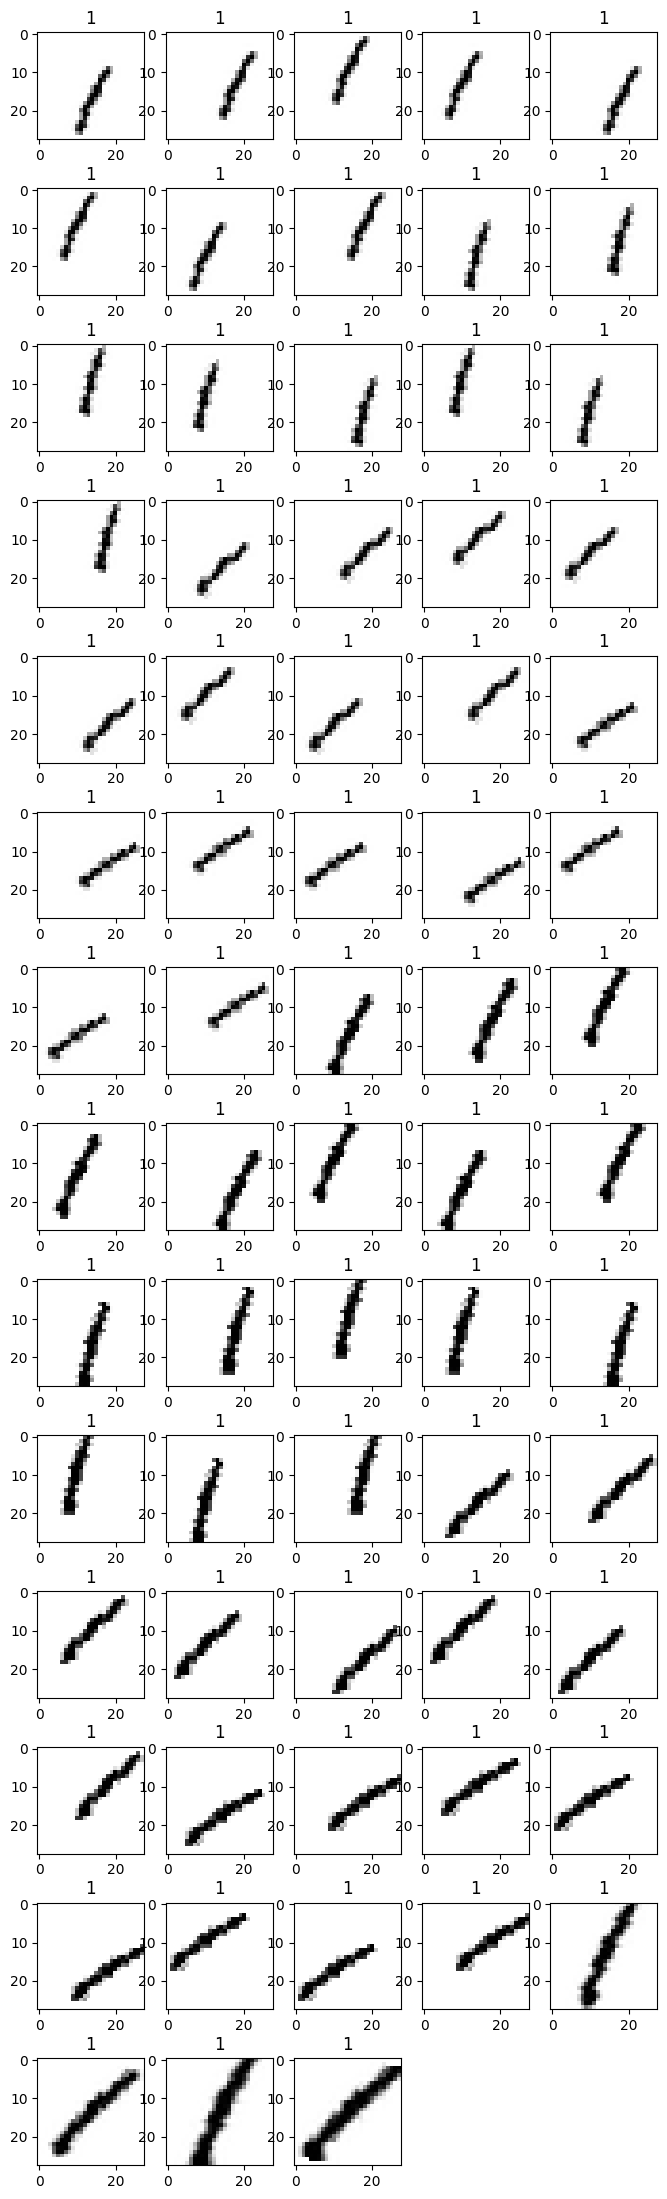

In [18]:
plot_digits(df[:68])

### Plot random 100 digits from dataset

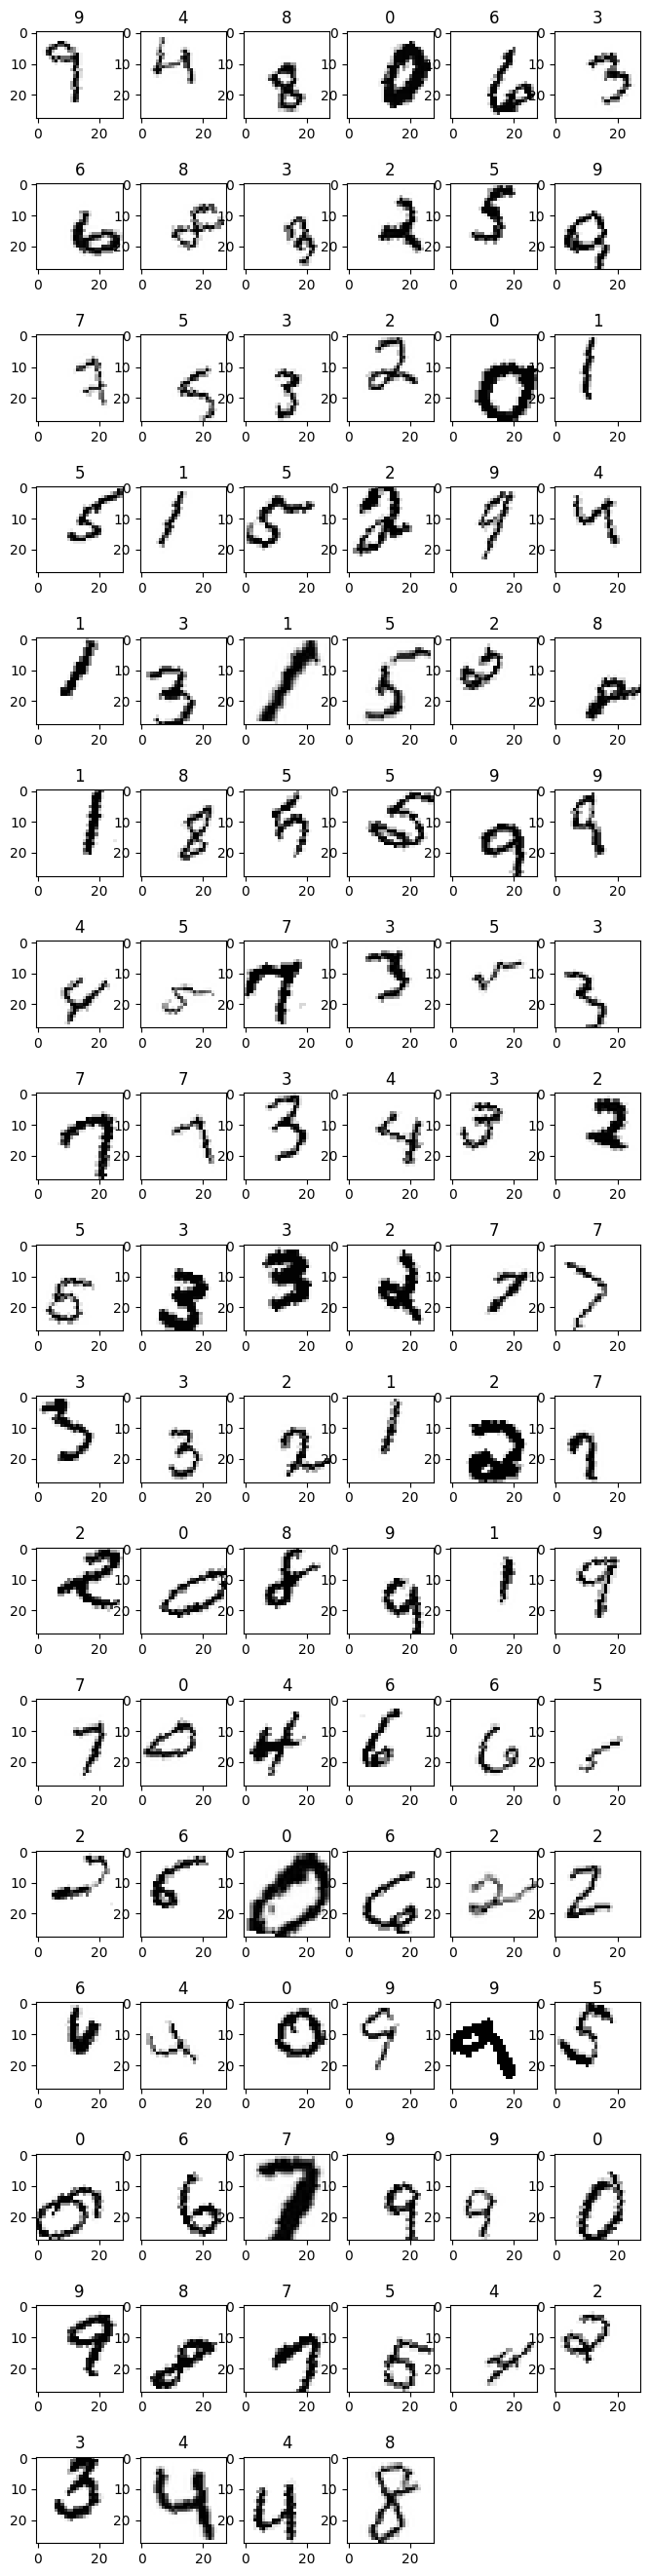

In [20]:
plot_digits(df.sample(100), 6)

As we can see, digits are much more diverse now. Although, I think that rotation may be too big actually. Some digits really don't look like they should.

### Plot average digit

In [21]:
def plot_avg_digit(df, rows=4, cols=3):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,8))

    i = 0
    for r in list(range(rows)):
        for c in list(range(cols)):
            arr = df[df["label"] == i].iloc[:,1:].mean().to_numpy().reshape((28,28))
            if np.all(np.isnan(arr)):
                i += 1
                fig.delaxes(ax[r,c])
                continue
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(i)
            i += 1


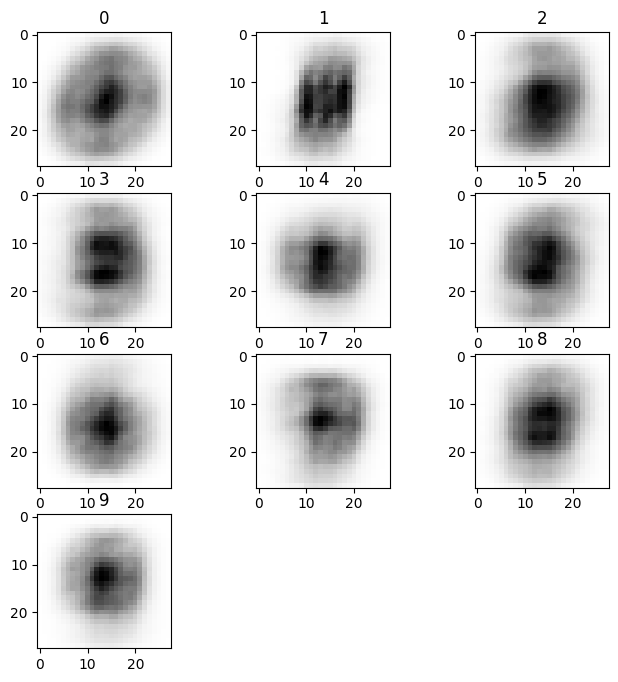

In [22]:
plot_avg_digit(df)

It's little worrying for me that all possible values are looking very similar now.

### Let's try fit models

In [3]:
from sklearn import model_selection

In [4]:
df.sample(frac=1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2259710,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1446571,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
723984,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097260,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1154272,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637170,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301298,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1205753,0,0,0,0,0,0,0,0,13,203,...,0,0,0,0,0,0,0,0,0,0
107233,7,0,0,0,0,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(2856000, 785)

In [8]:
idx = int(0.8 * df.shape[0])

In [3]:
X_train = df.iloc[:80000, 1:].values
y_train = df.iloc[:80000, 0].values

In [4]:
X_val = df.iloc[80000:100000, 1:].values
y_val = df.iloc[80000:100000, 0].values

In [5]:
from sklearn.svm import SVC

In [6]:
svc = SVC(C=0.1, gamma=1, kernel="poly")
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [7]:
svc.score(X_val, y_val)

0.89395